# Main from page for WL characterization

Please select the csv file with the data to analyze

In [24]:
from ipyfilechooser import FileChooser

fc = FileChooser()
display(fc)

FileChooser(path='/Users/vrodri3/devel/doctorado/detector', filename='', title='', show_hidden=False, select_d…

In [32]:
if not fc.selected:
    #file_name = 'post_silicon/skx_executions_emon/summary.csv'
    #file_name = "post_silicon/summary.csv"
    file_name = "post_silicon/summary_phd.csv"
else:
    file_name = fc.selected


## PCA 

In [33]:
from pca.pca import *
import pandas as pd

df_data = pd.read_csv(file_name)
df_data.fillna(0,inplace=True)
display(df_data)

features = list(df_data.columns)[2:]
test_column = list(df_data.columns)[0]


pca_df = get_PCA(df_data,features)


,test_name,cpi,cpu_bound,branch_mispredict,retired_per_instr,llc_mpi,metric_llc,numa_reads_dram,upi_bw,fp_single_precision,...,tma_fp_vector,frontend_bound,memory_bound,dram_bound,core_bound,l1_bound,l2_bound,l3_bound,store_bound,dram_bw
0,mlc_sgx-5bd217db-fbba-40d1-8235-264fa35152fc,5.274669,4.927819,0.059253,0.002755,0.000149,0.006785,65.961594,62.415360,0.000000e+00,...,0.000000e+00,30.341640,13.490876,0.384870,39.440350,6.576403,0.874219,3.295948,0.384150,123.160468
1,glibc_bench-d4ce9d2b-9e1e-4aeb-954e-29dd6d8bbd70,0.405729,1.510634,0.011933,0.000593,0.000077,0.000275,16.408221,31.336957,3.933635e-04,...,3.257387e-01,13.157260,9.461179,0.875619,11.310952,10.431353,0.947527,2.473411,3.330897,214.796526
2,resnet50v15_pytorch_aiaoob-686b5a6f-7933-40a9-...,0.940477,0.275256,0.025658,0.000393,0.000163,0.000697,27.045981,14.434081,1.709256e-07,...,0.000000e+00,31.051382,3.940717,0.356848,32.279628,2.517301,0.368963,2.146054,0.254907,4.007427
3,wasm_bench-baeb893f-5288-4efa-a74a-cb4fe292898f,5.677742,18.451797,0.004736,0.000322,0.000462,0.000446,73.359996,677.680165,8.269617e-03,...,6.440639e-08,13.160028,12.892970,1.064176,58.670118,15.137343,0.399320,1.428926,0.256955,236.367057
4,specjbb_2015-616b60fd-fbac-4f8f-94cb-1b45e6cf572d,1.121672,15.944388,0.017045,0.003180,0.001584,0.001781,2.263110,459.035930,3.373415e-05,...,2.115557e-02,21.357314,29.346042,15.368895,15.544975,18.279688,3.486455,10.614274,1.861984,6368.432166
5,bert_large_oss-dd3807b9-ea12-46c4-8fcc-85e2177...,0.939804,0.190992,0.017842,0.000747,0.000150,0.000228,48.130890,13.300517,0.000000e+00,...,0.000000e+00,25.946639,13.045273,1.063734,28.355847,5.716200,0.178464,1.970835,0.839865,2.868434
6,mlc_sgx-1979aaca-bd6d-47d3-b059-7d2dcd2a32d7,190.949968,82.156680,0.014655,0.003020,0.005395,0.002745,36.723268,22202.414592,0.000000e+00,...,0.000000e+00,23.697850,27.205527,0.127417,32.322848,0.134097,0.017233,0.103791,0.025627,171.531524
7,fio-f066e359-fac7-4be5-b6ed-35cf6f7c20e4,0.932569,0.236131,0.005071,0.001327,0.000204,0.000857,46.927344,70.847178,1.246193e-08,...,0.000000e+00,17.074606,35.935670,3.529312,18.349380,5.755712,1.050928,2.988624,1.278538,19.437723
8,fio-a7da4ad4-a485-4249-889f-0f0ff43257f4,1.105269,0.230502,0.009562,0.001000,0.001105,0.001782,44.773262,29.255809,0.000000e+00,...,0.000000e+00,17.802523,37.244530,5.716708,17.272071,7.801363,1.170877,3.412900,1.440736,122.366266
9,resnet50_tensorflow_ali-b964df21-c46a-4fde-a36...,1.021147,0.250265,0.040189,0.000935,0.000077,0.002904,61.926740,17.895281,0.000000e+00,...,0.000000e+00,30.527761,42.772440,7.737226,0.000000,18.419003,4.169886,12.637403,7.291295,1.559960


## Explained variance

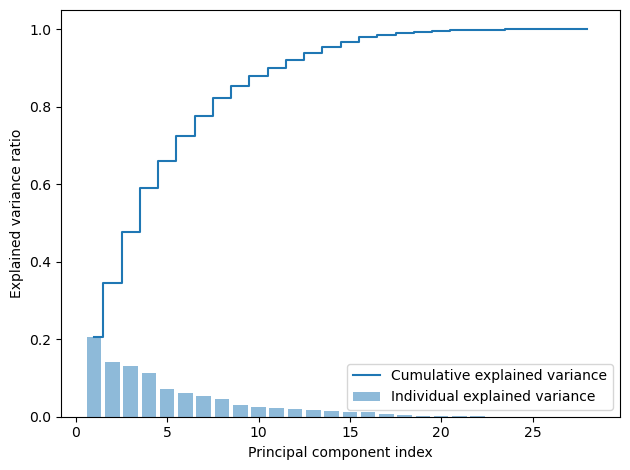

In [34]:
from pca.pca import *
x = get_features(df_data,features)
X_std = StandardScaler().fit_transform(x)
exp_var_pca = get_explained_variance(X_std)
plot_explained_variance(exp_var_pca)

## PCA plot 

,principal component 1,principal component 2,test_name
0,-3.352215,-1.738966,mlc_sgx-5bd217db-fbba-40d1-8235-264fa35152fc
1,0.893240,6.619282,glibc_bench-d4ce9d2b-9e1e-4aeb-954e-29dd6d8bbd70
2,-1.873558,-0.096276,resnet50v15_pytorch_aiaoob-686b5a6f-7933-40a9-...
3,-1.538628,1.485166,wasm_bench-baeb893f-5288-4efa-a74a-cb4fe292898f
4,0.746415,-1.343740,specjbb_2015-616b60fd-fbac-4f8f-94cb-1b45e6cf572d
5,-1.386389,-0.318363,bert_large_oss-dd3807b9-ea12-46c4-8fcc-85e2177...
6,-1.935675,-0.905749,mlc_sgx-1979aaca-bd6d-47d3-b059-7d2dcd2a32d7
7,-0.304916,-0.474310,fio-f066e359-fac7-4be5-b6ed-35cf6f7c20e4
8,-0.179637,-0.709949,fio-a7da4ad4-a485-4249-889f-0f0ff43257f4
9,0.691031,-2.421360,resnet50_tensorflow_ali-b964df21-c46a-4fde-a36...


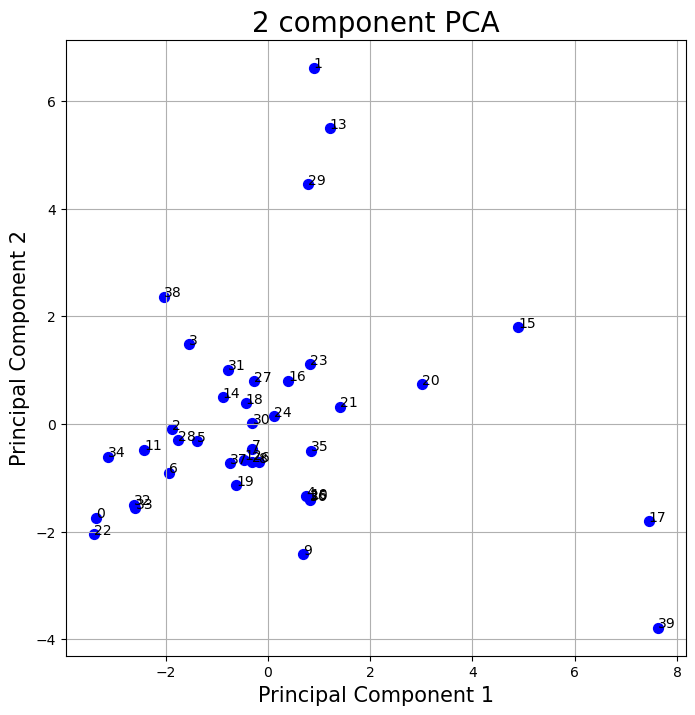

In [35]:
from pca.pca import *
display(pca_df)
plot_PCA(pca_df)

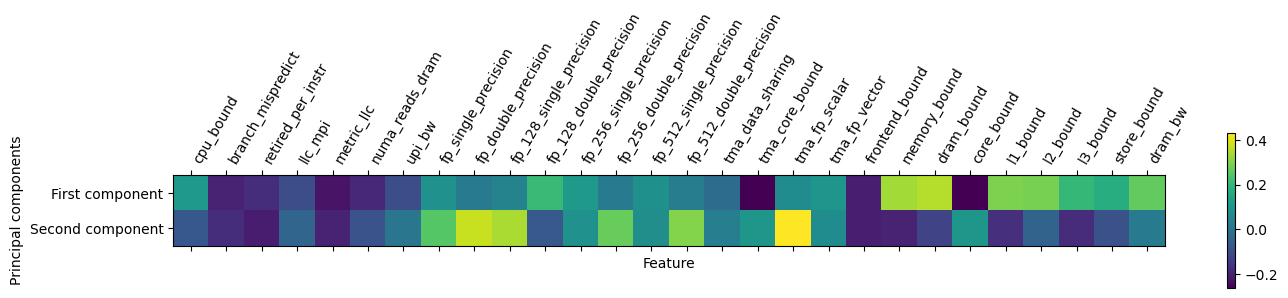

In [36]:
from pca.pca import *
plot_pca_vectors(X_std, features)

## Calculate optimal number of clusters

In [37]:
from clustering.distortion import *
from clustering.cluster_score import *
clusters = calculate_elbow(pca_df)[0]
display(f"Optimal number of clusters = {clusters}")

'Optimal number of clusters = 4'

,cluster,test_name,principal component 1,principal component 2
2,2,bert_large_oss-dd3807b9-ea12-46c4-8fcc-85e2177...,-1.386389,-0.318363
0,0,bert_large_tensorflow-3eaaff1d-f3e5-445f-82a6-...,1.401514,0.317526
0,0,bertlarge_pytorch_aiaoob-2c7a489f-e840-4b7e-9b...,-0.782563,1.008556
0,0,cassandra-4b12cf28-4fa4-4440-9cdd-0ff09726331d,-0.313283,-0.704229
0,0,clickhouse-fe18b635-d0c1-4b94-9168-30ee7239bf9d,-0.748984,-0.726145
3,3,distilbert_pytorch-93ee76dd-84c9-4248-8fa0-fde...,7.619515,-3.786397
0,0,dlrm_pytorch_aiaoob-aba88c7a-0818-4ee4-8ad8-12...,0.128998,0.147071
0,0,fio-a7da4ad4-a485-4249-889f-0f0ff43257f4,-0.179637,-0.709949
0,0,fio-f066e359-fac7-4be5-b6ed-35cf6f7c20e4,-0.304916,-0.474310
1,1,glibc_bench-924f8fd4-62e0-4c18-955f-f3c744c00072,0.778364,4.451115


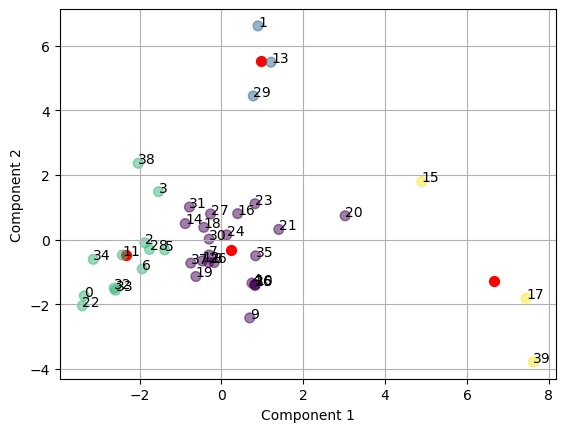

In [38]:
from clustering.clustering import *
df_result,kmeans = kmean_cluster(pca_df,clusters)

# create a DF based on KMEANS prediuction
df_clusters = df_result[['PRED', 'test_name']].copy()
df_clusters.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters["principal component 1"] = pca_df_sorted["principal component 1"].values
df_clusters["principal component 2"] = pca_df_sorted["principal component 2"].values
df_clusters.rename(columns={'PRED': 'cluster'}, inplace=True)
display(df_clusters)
plot_kmeans(pca_df, kmeans)

## Clasification based on optimal number of clusters


In [14]:
from clustering.clustering import *

# create a DF based on real known kind
df_clusters_ = df_data[['Kind', 'test_name']].copy()
df_clusters_.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted_ = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters_["principal component 1"] = pca_df_sorted_["principal component 1"].values
df_clusters_["principal component 2"] = pca_df_sorted_["principal component 2"].values
df_clusters_.rename(columns={'Kind': 'cluster'}, inplace=True)
display(df_clusters_)


KeyError: "['Kind'] not in index"

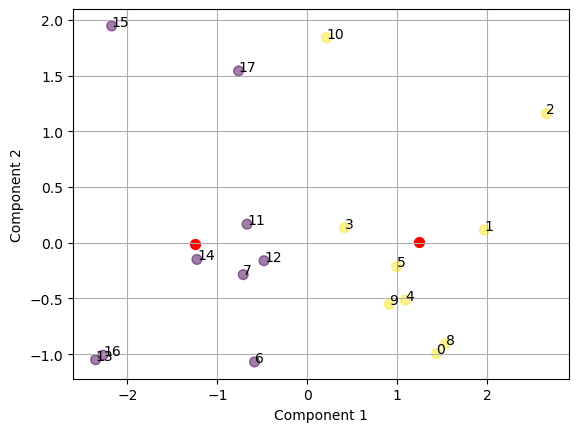

In [10]:
 plot_kmeans(pca_df, kmeans)

### Automatic label of clusters based cosine similarity to FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}


A = PRED -> 0
cosine_similarity vs fp_tests 0.21081851067789195
cosine_similarity vs int_tests 0.8249579113843053
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster

B = PRED -> 1
cosine_similarity vs fp_tests 0.8432740427115678
cosine_similarity vs int_tests 0.1178511301977579
cosine_similarity_fp > cosine_similarity_int
Assigining 0 label to pred cluster
            labels  val_pred  val_true
0         657.xz_s         1         1
1       654.roms_s         0         0
1  649.fotonik3d_s         0         0
0  648.exchange2_s         1         1
0        644.nab_s         1         0
0      641.leela_s         1         1
0    638.imagick_s         1         0
0  631.deepsjeng_s         1         1
1       628.pop2_s         0         0
1        627.cam_s         0         0
0       625.x264_s         1         1
0  623.xalancbmk_s         1         1
1        621.wrf_s         0         0
0    620.omnetpp_s         1         1
1        619.lbm_s        

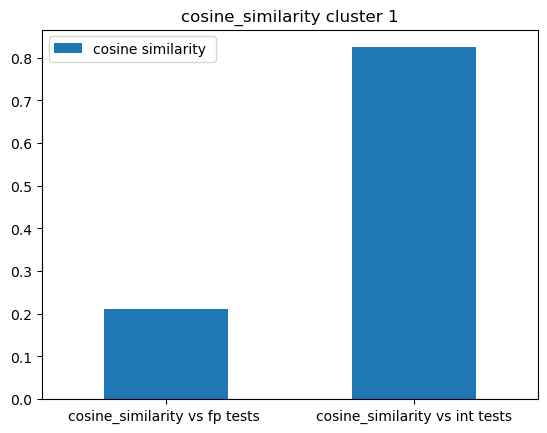

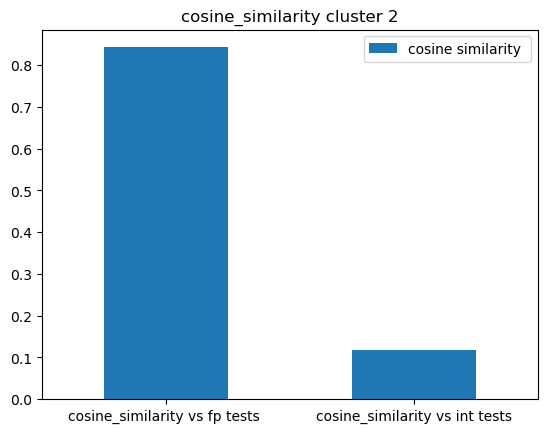

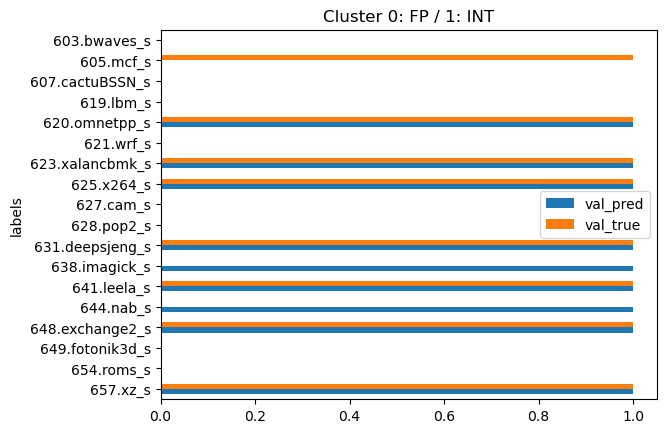

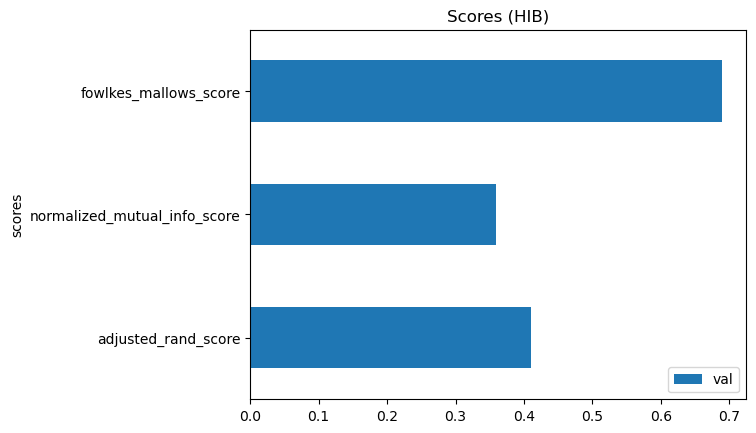

In [12]:
df_sorted = df_data.sort_values(by='Kind')
fp_tests = df_sorted[df_sorted['Kind'] == 0]
int_tests = df_sorted[df_sorted['Kind'] == 1]

df = df_result
df_sorted = df.sort_values(by='PRED')
A = df_sorted[df_sorted['PRED'] == 0]
B = df_sorted[df_sorted['PRED'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)

REAL_sorted = df_data.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["PRED"].tolist()
labels_pred_ = [eval(i) for i in labels_pred]
labels_pred = labels_pred_

labels_true = REAL_sorted["Kind"].tolist()

df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})

print(df)
print(df.loc[~(df['val_pred'] == df['val_true'])])

ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")


scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")

## Use supervised ML to validate with testing and training data

In [13]:
# Use known kind based on SPEC documentation
X = df_clusters_[["principal component 1","principal component 2"]]
y = df_clusters_[["cluster"]]

# Use known kind based on KMEANS prediction
#X = df_clusters[["principal component 1","principal component 2"]]
#y = df_clusters[["cluster"]]

accuracy_results = {}


In [14]:
def get_accuracty(X,y,loops,clf):
    p_total = 0
    r_total = 0
    f_total = 0

    for i in range(loops):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
        clf.fit(X_train,y_train)

        # Predict Accuracy Score
        y_pred = clf.predict(X_test)
        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)

        p_total += p
        r_total += r
        f_total += f
    return p_total,r_total,f_total

### K-Nearest Neighbors Algorithm


In [15]:
# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn_score = 0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train.values.ravel())
    knn_score += knn.score(X_test, y_test)

print(f'knn.score average  = {knn_score/10}')

accuracy_results['knn_score'] = knn_score/10

knn.score average  = 1.0


### Decision Tree Algorithm

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loops = 10
clf = DecisionTreeClassifier()
p_total,r_total,f_total = get_accuracty(X,y,loops,clf)
    
print(f"Precision score {p_total/10}")
print(f"Recall score {r_total/10}")
print(f"F-beta score {f_total/10}")

accuracy_results['dt_precision_score'] = p_total/10
accuracy_results['dt_recall_score'] = r_total/10
accuracy_results['dt_fbeta_score'] = f_total/10

Precision score 0.825
Recall score 0.85
F-beta score 0.8028571428571428


### Support vector machine algorithm

In [17]:
from sklearn import svm

p_total = 0
r_total = 0
f_total = 0

clf = svm.SVC(kernel='linear') # Linear Kernel

for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

    #Create a svm Classifier

    #Train the model using the training sets
    clf.fit(X_train, y_train.values.ravel())

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    

    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
    
    p_total += p
    r_total += r
    f_total += f
    
accuracy_results['svm_precision_score'] = p_total/10
accuracy_results['svm_recall_score'] = r_total/10
accuracy_results['svm_fbeta_score'] = f_total/10


## Plot Scores

,algorithm,accuracy
0,knn_score,1.000000
1,dt_precision_score,0.825000
2,dt_recall_score,0.850000
3,dt_fbeta_score,0.802857
4,svm_precision_score,1.000000
5,svm_recall_score,1.000000
6,svm_fbeta_score,1.000000


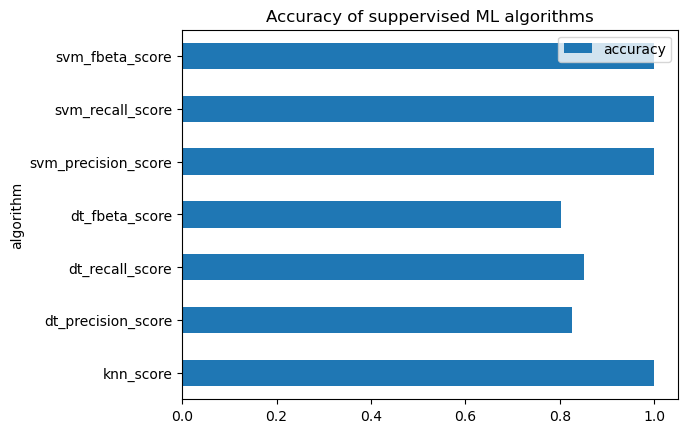

In [18]:
accuracy_results_df = pd.DataFrame(list(accuracy_results.items()),columns=['algorithm','accuracy'])
display(accuracy_results_df)
accuracy_results_df.plot.barh(x='algorithm', title = 'Accuracy of suppervised ML algorithms');